# Title of ML project : Cosmetics & Beauty Products Reviews of Top Brands from Nyka.com

# Name : Renjitha E R

# Organization : Entri Elevate

https://tradebrains.in/wp-content/uploads/2021/10/nykaa-logo.jpg

# Overview of Problem Statement

The aim of this project is to analyze and predict insights from product reviews of cosmetics brands using machine learning techniques. The dataset contains product reviews from Nykaa, including various features that describe the reviews and user sentiments. The ultimate goal is to build an accurate predictive model that can identify patterns, sentiment, or ratings based on the available features.

By performing extensive data preprocessing, exploratory data analysis (EDA), and applying multiple machine learning models, this project seeks to understand the key factors influencing product ratings, sentiment trends, or user behavior.

# Objective
To forecast the cosmetics and beauty product brands that will experience an increase in sales in the future.

# Data Description

Source Of Data: The dataset collected from Kaggle

Feature :

product_id             : Identifier for the product.
brand_name             : Name of the brand.
review_id              : Identifier for the review.
review_title           : Title of the review.
review_text	           : Content of the review.
author	               : Name of the review author.
review_date            : Date of the review.
review_rating          : Rating given by the reviewer.
is_a_buyer             : Indicates if the reviewer is a verified buyer.
pro_user               : Indicates if the reviewer is a professional user.
review_label           : Label assigned to the review.
product_title          : Title of the product.
mrp                    : Maximum retail price of the product.
price                  : Current price of the product.
product_rating         : Average rating of the product.
product_rating_count   : Count of ratings for the product.
product_tags           : Tags associated with the product.
product_url            : URL of the product page.

# Data Collection

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
import joblib

In [11]:
# Load the dataset
data  = pd.read_csv('nyka_top_brands_cosmetics_product_reviews.1.csv')

In [13]:
data.head(5)

,product_id,brand_name,review_id,review_title,review_text,author,review_year,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url
0,781070,1,16752142,Worth buying 50g one,Works as it claims. Could see the difference f...,Ashton Dsouza,2021,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
1,781070,1,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoo...,Amrit Neelam,2020,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
2,781070,1,15618995,perfect for summers dry for winters,I have been using this product for months now....,Sanchi Gupta,2020,4.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
3,781070,1,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a...",Ruchi Shah,2020,3.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
4,781070,1,16338982,Average,It's not that good. Please refresh try for oth...,Sukanya Sarkar,2020,2.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...


In [15]:
data.tail(5)

,product_id,brand_name,review_id,review_title,review_text,author,review_year,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url
61279,1044490,10,17769058,Good,I use this thrice a week. Has helped me in mak...,Radhesh,2021,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...
61280,1044490,10,17766838,Great,This shampoo has a amazing fragnance and textu...,Shalini Sirohi,2021,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...
61281,1044490,10,17765866,Really mild and nice,"Used it for the first time, feels really fresh...",Sana kanted,2021,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...
61282,1044490,10,17761057,Amazing product!,One of the best shampoo which are sulphate and...,neeru chouhan,2021,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...
61283,4633369,11,25987603,Not good,It is so irritating so bad i don't like this much,Mssuhv,2022,2.0,False,False,NaN,Colorbar Mogra Mist - Scent Of An India Temple...,595,417,1.5,2,NaN,https://www.nykaa.com/colorbar-mogra-mist-scen...


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61284 entries, 0 to 61283
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            61284 non-null  int64  
 1   brand_name            61284 non-null  int64  
 2   review_id             61284 non-null  int64  
 3   review_title          61284 non-null  object 
 4   review_text           61275 non-null  object 
 5   author                61284 non-null  object 
 6   review_year           61284 non-null  int64  
 7   review_rating         61283 non-null  float64
 8   is_a_buyer            61284 non-null  bool   
 9   pro_user              61284 non-null  bool   
 10  review_label          48249 non-null  object 
 11  product_title         61284 non-null  object 
 12  mrp                   61284 non-null  int64  
 13  price                 61284 non-null  int64  
 14  product_rating        61284 non-null  float64
 15  product_rating_coun

In [19]:
data.describe()

,product_id,brand_name,review_id,review_year,review_rating,mrp,price,product_rating,product_rating_count
count,6.128400e+04,61284.000000,6.128400e+04,61284.000000,61283.000000,61284.000000,61284.000000,61284.000000,61284.000000
mean,7.983802e+05,6.269973,1.484995e+07,2020.124747,4.414781,573.260247,462.129512,4.099130,7582.963840
std,1.281418e+06,2.681349,7.383506e+06,1.375558,1.062547,324.098930,264.876964,0.235945,14463.246136
min,2.500000e+02,1.000000,9.600000e+01,2013.000000,1.000000,75.000000,45.000000,1.500000,1.000000
25%,1.604880e+05,3.000000,1.102373e+07,2019.000000,4.000000,300.000000,262.000000,4.000000,1760.000000
50%,4.524430e+05,7.000000,1.525142e+07,2020.000000,5.000000,599.000000,400.000000,4.100000,3925.000000
75%,7.665290e+05,9.000000,2.002927e+07,2021.000000,5.000000,799.000000,639.000000,4.300000,8720.000000
max,7.749427e+06,11.000000,2.963031e+07,2022.000000,5.000000,3874.000000,2947.000000,4.800000,98477.000000


# Data Preprocessing - Data Cleaning

In [21]:
# Remove unwanted columns
data.drop(columns=['product_id', 'review_id','review_title', 'review_text','author','review_label','product_tags','product_url' ], inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61284 entries, 0 to 61283
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand_name            61284 non-null  int64  
 1   review_year           61284 non-null  int64  
 2   review_rating         61283 non-null  float64
 3   is_a_buyer            61284 non-null  bool   
 4   pro_user              61284 non-null  bool   
 5   product_title         61284 non-null  object 
 6   mrp                   61284 non-null  int64  
 7   price                 61284 non-null  int64  
 8   product_rating        61284 non-null  float64
 9   product_rating_count  61284 non-null  int64  
dtypes: bool(2), float64(2), int64(5), object(1)
memory usage: 3.9+ MB


In [25]:
data.isnull().sum()

brand_name              0
review_year             0
review_rating           1
is_a_buyer              0
pro_user                0
product_title           0
mrp                     0
price                   0
product_rating          0
product_rating_count    0
dtype: int64

In [27]:
data = data.dropna()

In [29]:
data.isnull().sum()

brand_name              0
review_year             0
review_rating           0
is_a_buyer              0
pro_user                0
product_title           0
mrp                     0
price                   0
product_rating          0
product_rating_count    0
dtype: int64

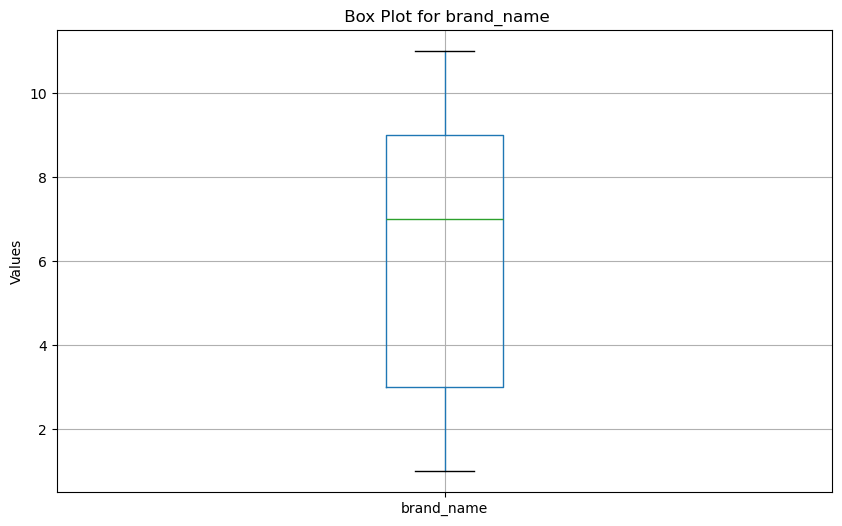

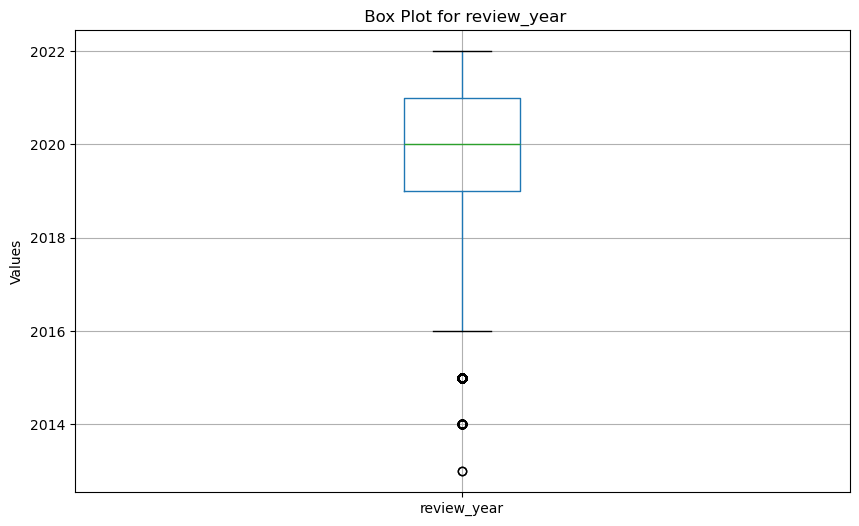

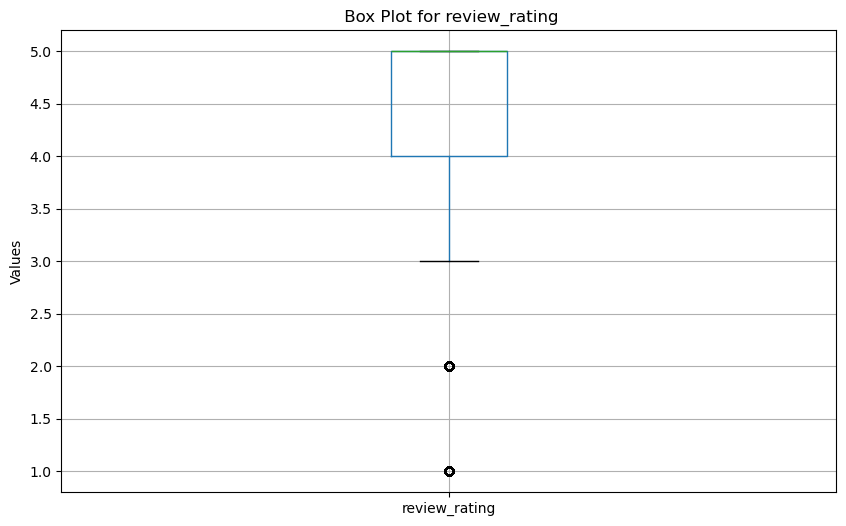

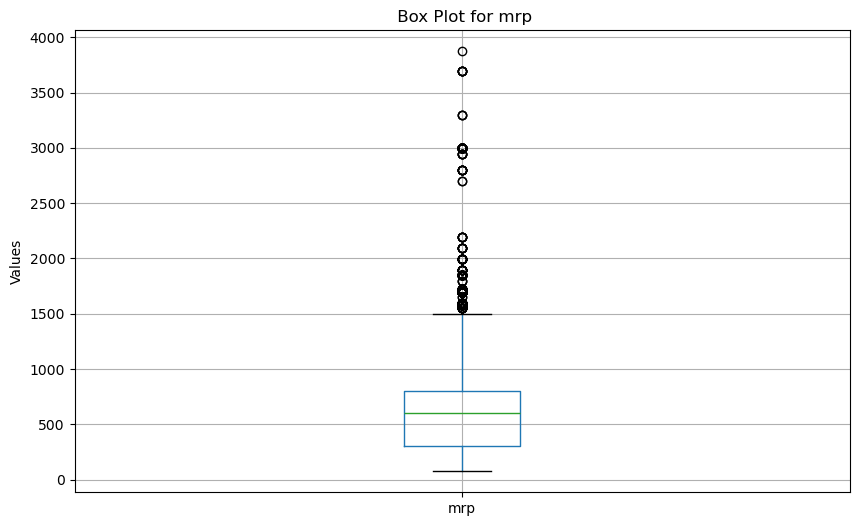

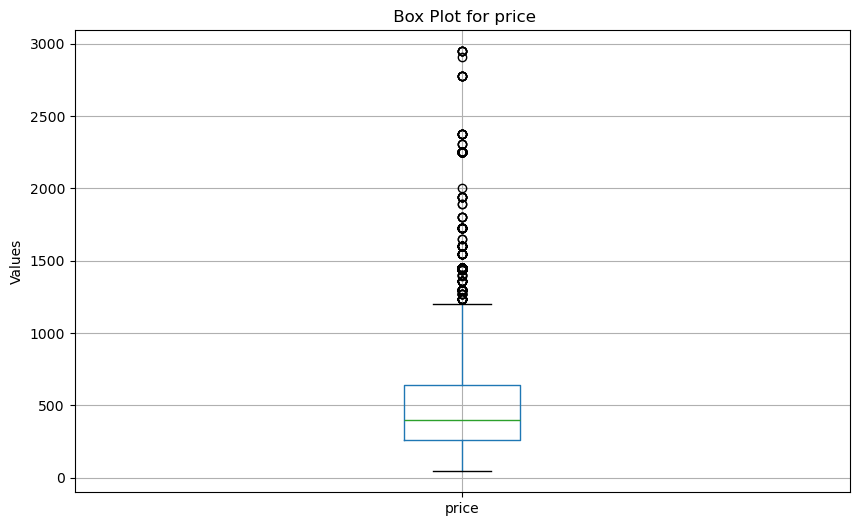

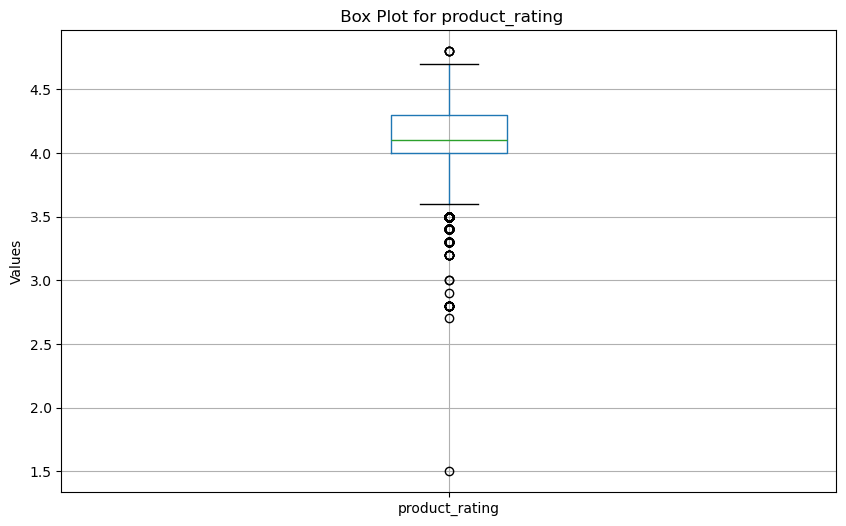

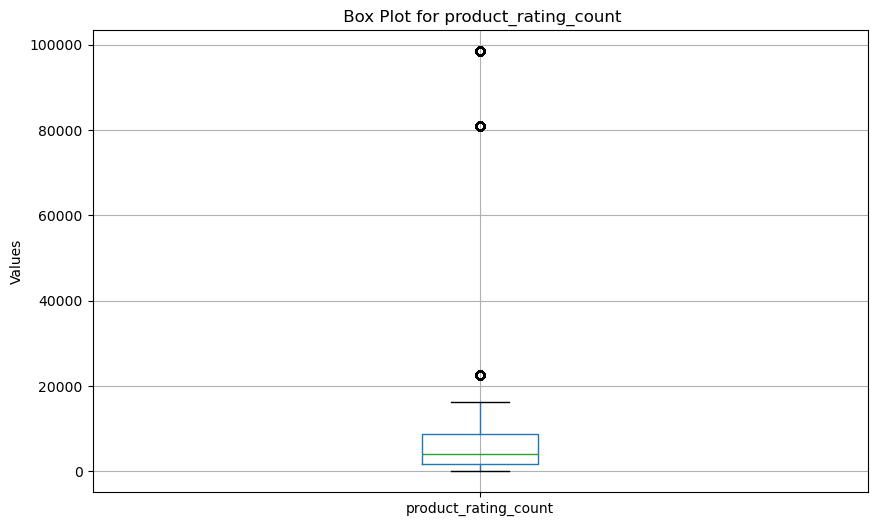

In [31]:
# Box Plot for visualize outliers
columns = data.select_dtypes(include = ['number'])

for col in columns.columns:
    plt.figure(figsize=(10,6))
    columns.boxplot(column = col)
    plt.title(f" Box Plot for {col}")
    plt.ylabel('Values')
    plt.show()

In [33]:
# Outlier's removel with IQR
def handle_outlier(data):
    for col in data.select_dtypes(include = ['int64','float64']).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)

        IQR = Q3 - Q1

        lower = Q1 - 1.5 *IQR
        upper = Q3 + 1.5 *IQR

        data[col] = data[col].apply(lambda x: 
        lower if x<lower else 
        upper if x>upper else
        x)
    return data
data1 = handle_outlier(data)

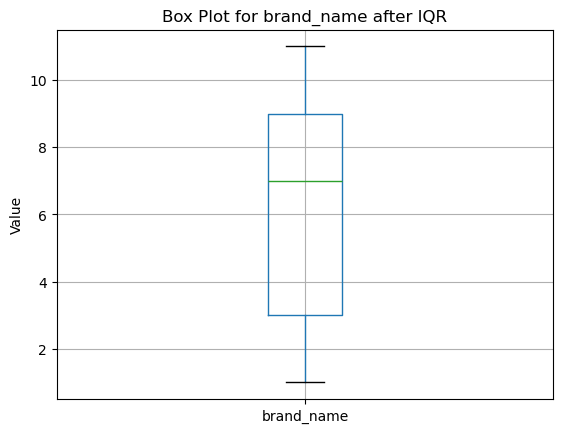

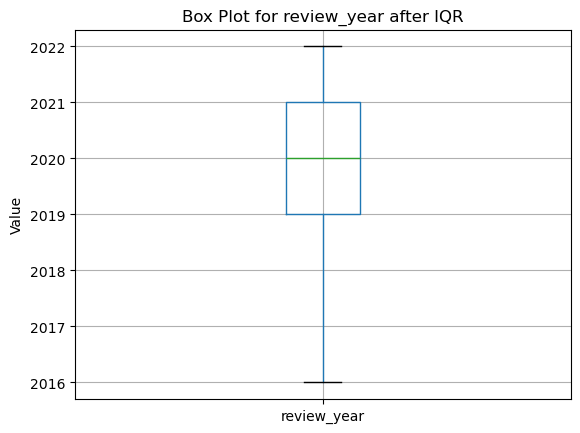

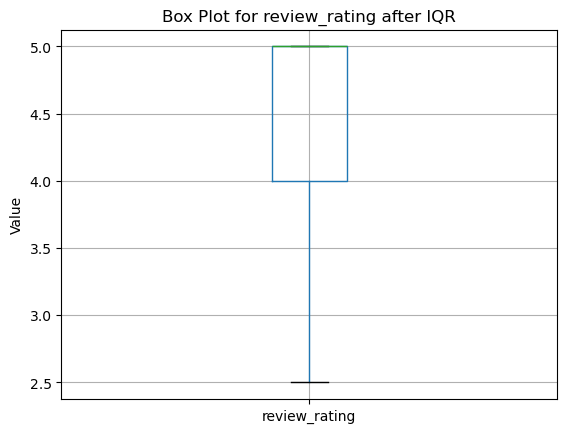

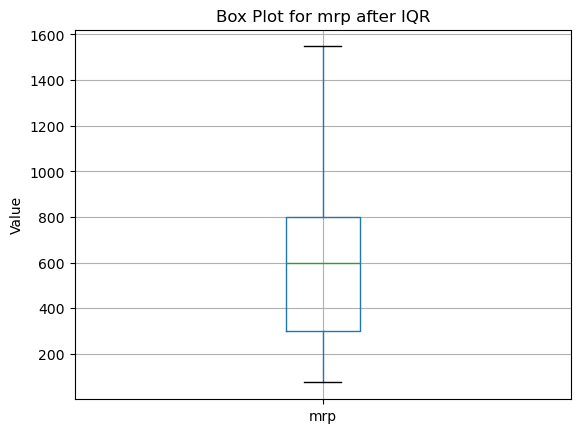

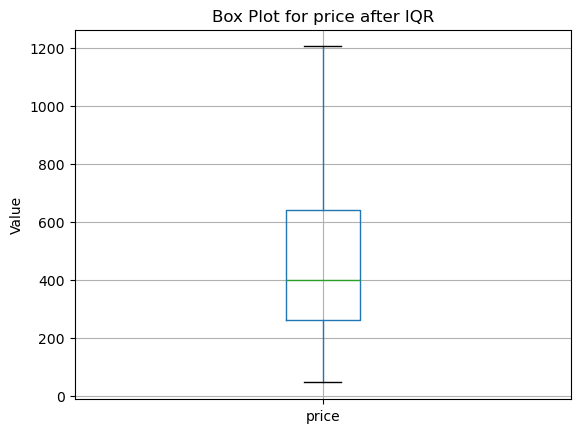

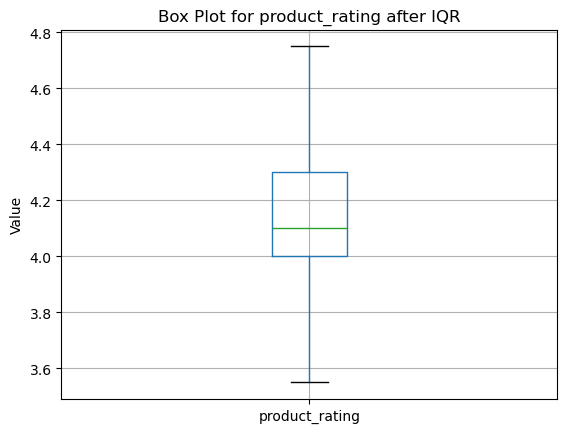

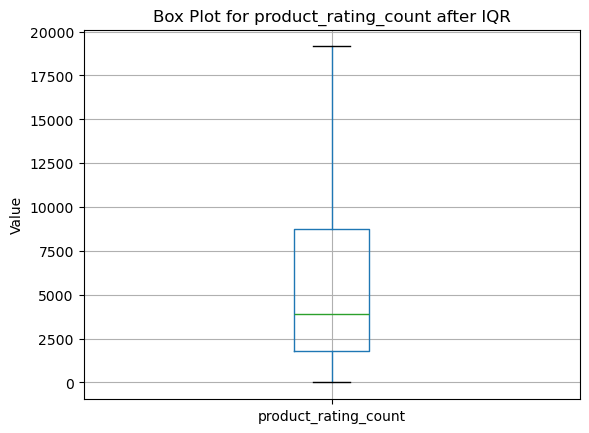

In [35]:
# Box-Plot after removing outliers
column = data1.select_dtypes(include=['int64','float64'])

for col in column.columns:
    plt.figure()
    column.boxplot(column = col)
    plt.title(f"Box Plot for {col} after IQR")
    plt.ylabel('Value')
    plt.show()

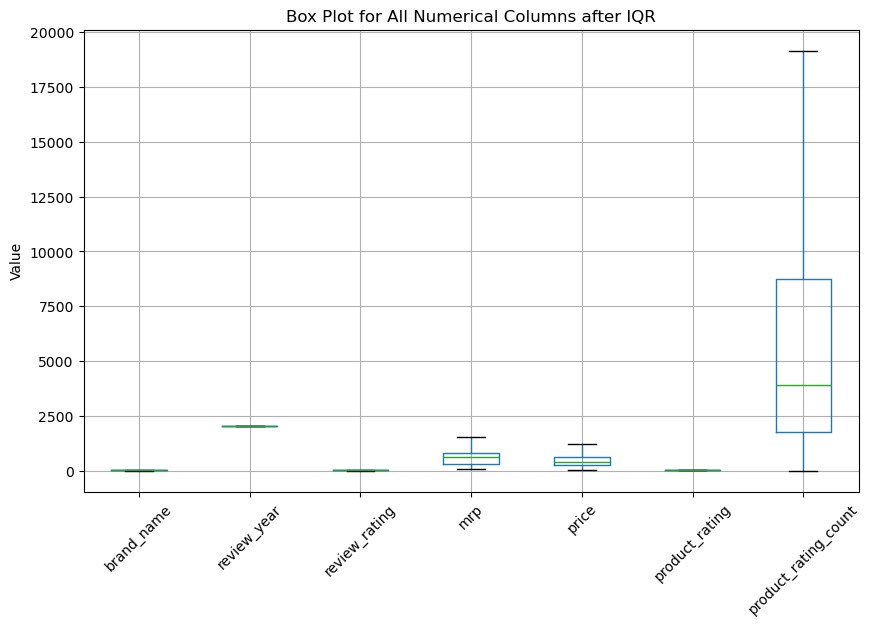

In [251]:
# Select numerical columns
columns = data1.select_dtypes(include=['int64', 'float64'])

# Create a single box plot for all numerical columns
plt.figure(figsize=(10, 6))
columns.boxplot()
plt.title("Box Plot for All Numerical Columns after IQR")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

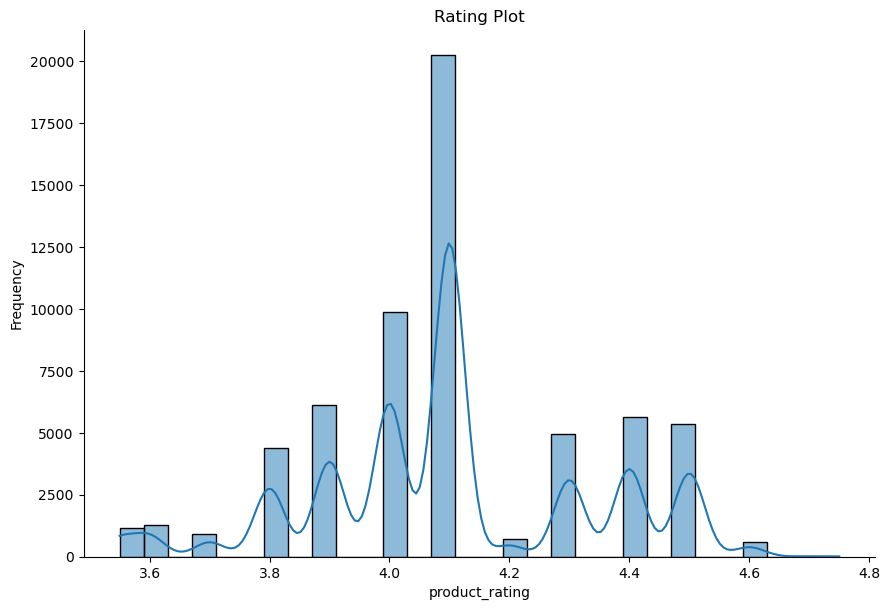

In [37]:
sns.displot(data1['product_rating'], bins = 30, kde =True,height = 6, aspect = 1.5)
plt.title('Rating Plot')
plt.xlabel('product_rating')
plt.ylabel('Frequency')
plt.show()

In [41]:
# Skewness for all the numerical features

numerical_features = data1.select_dtypes(include = ['int64','float64']).columns
print('\nSkewness of all the featres:\n')
print(data[numerical_features].skew())


Skewness of all the featres:

brand_name             -0.147946
review_year            -0.628462
review_rating          -1.434421
mrp                     0.572018
price                   0.622661
product_rating          0.027296
product_rating_count    1.131133
dtype: float64


In [43]:
# Analyzing highly skewed features
# This code identifies numerical features with significant skewness (absolute skewness > 0.5).
skewness = data1[numerical_features].apply(lambda x: skew(x))
skewed_feature = skewness[(skewness > 0.5)|(skewness < -0.5)].index
print("\nHighly Skewed Features are:\n\n", skewness[skewed_feature])


Highly Skewed Features are:

 review_year            -0.628447
review_rating          -1.434386
mrp                     0.572004
price                   0.622646
product_rating_count    1.131105
dtype: float64


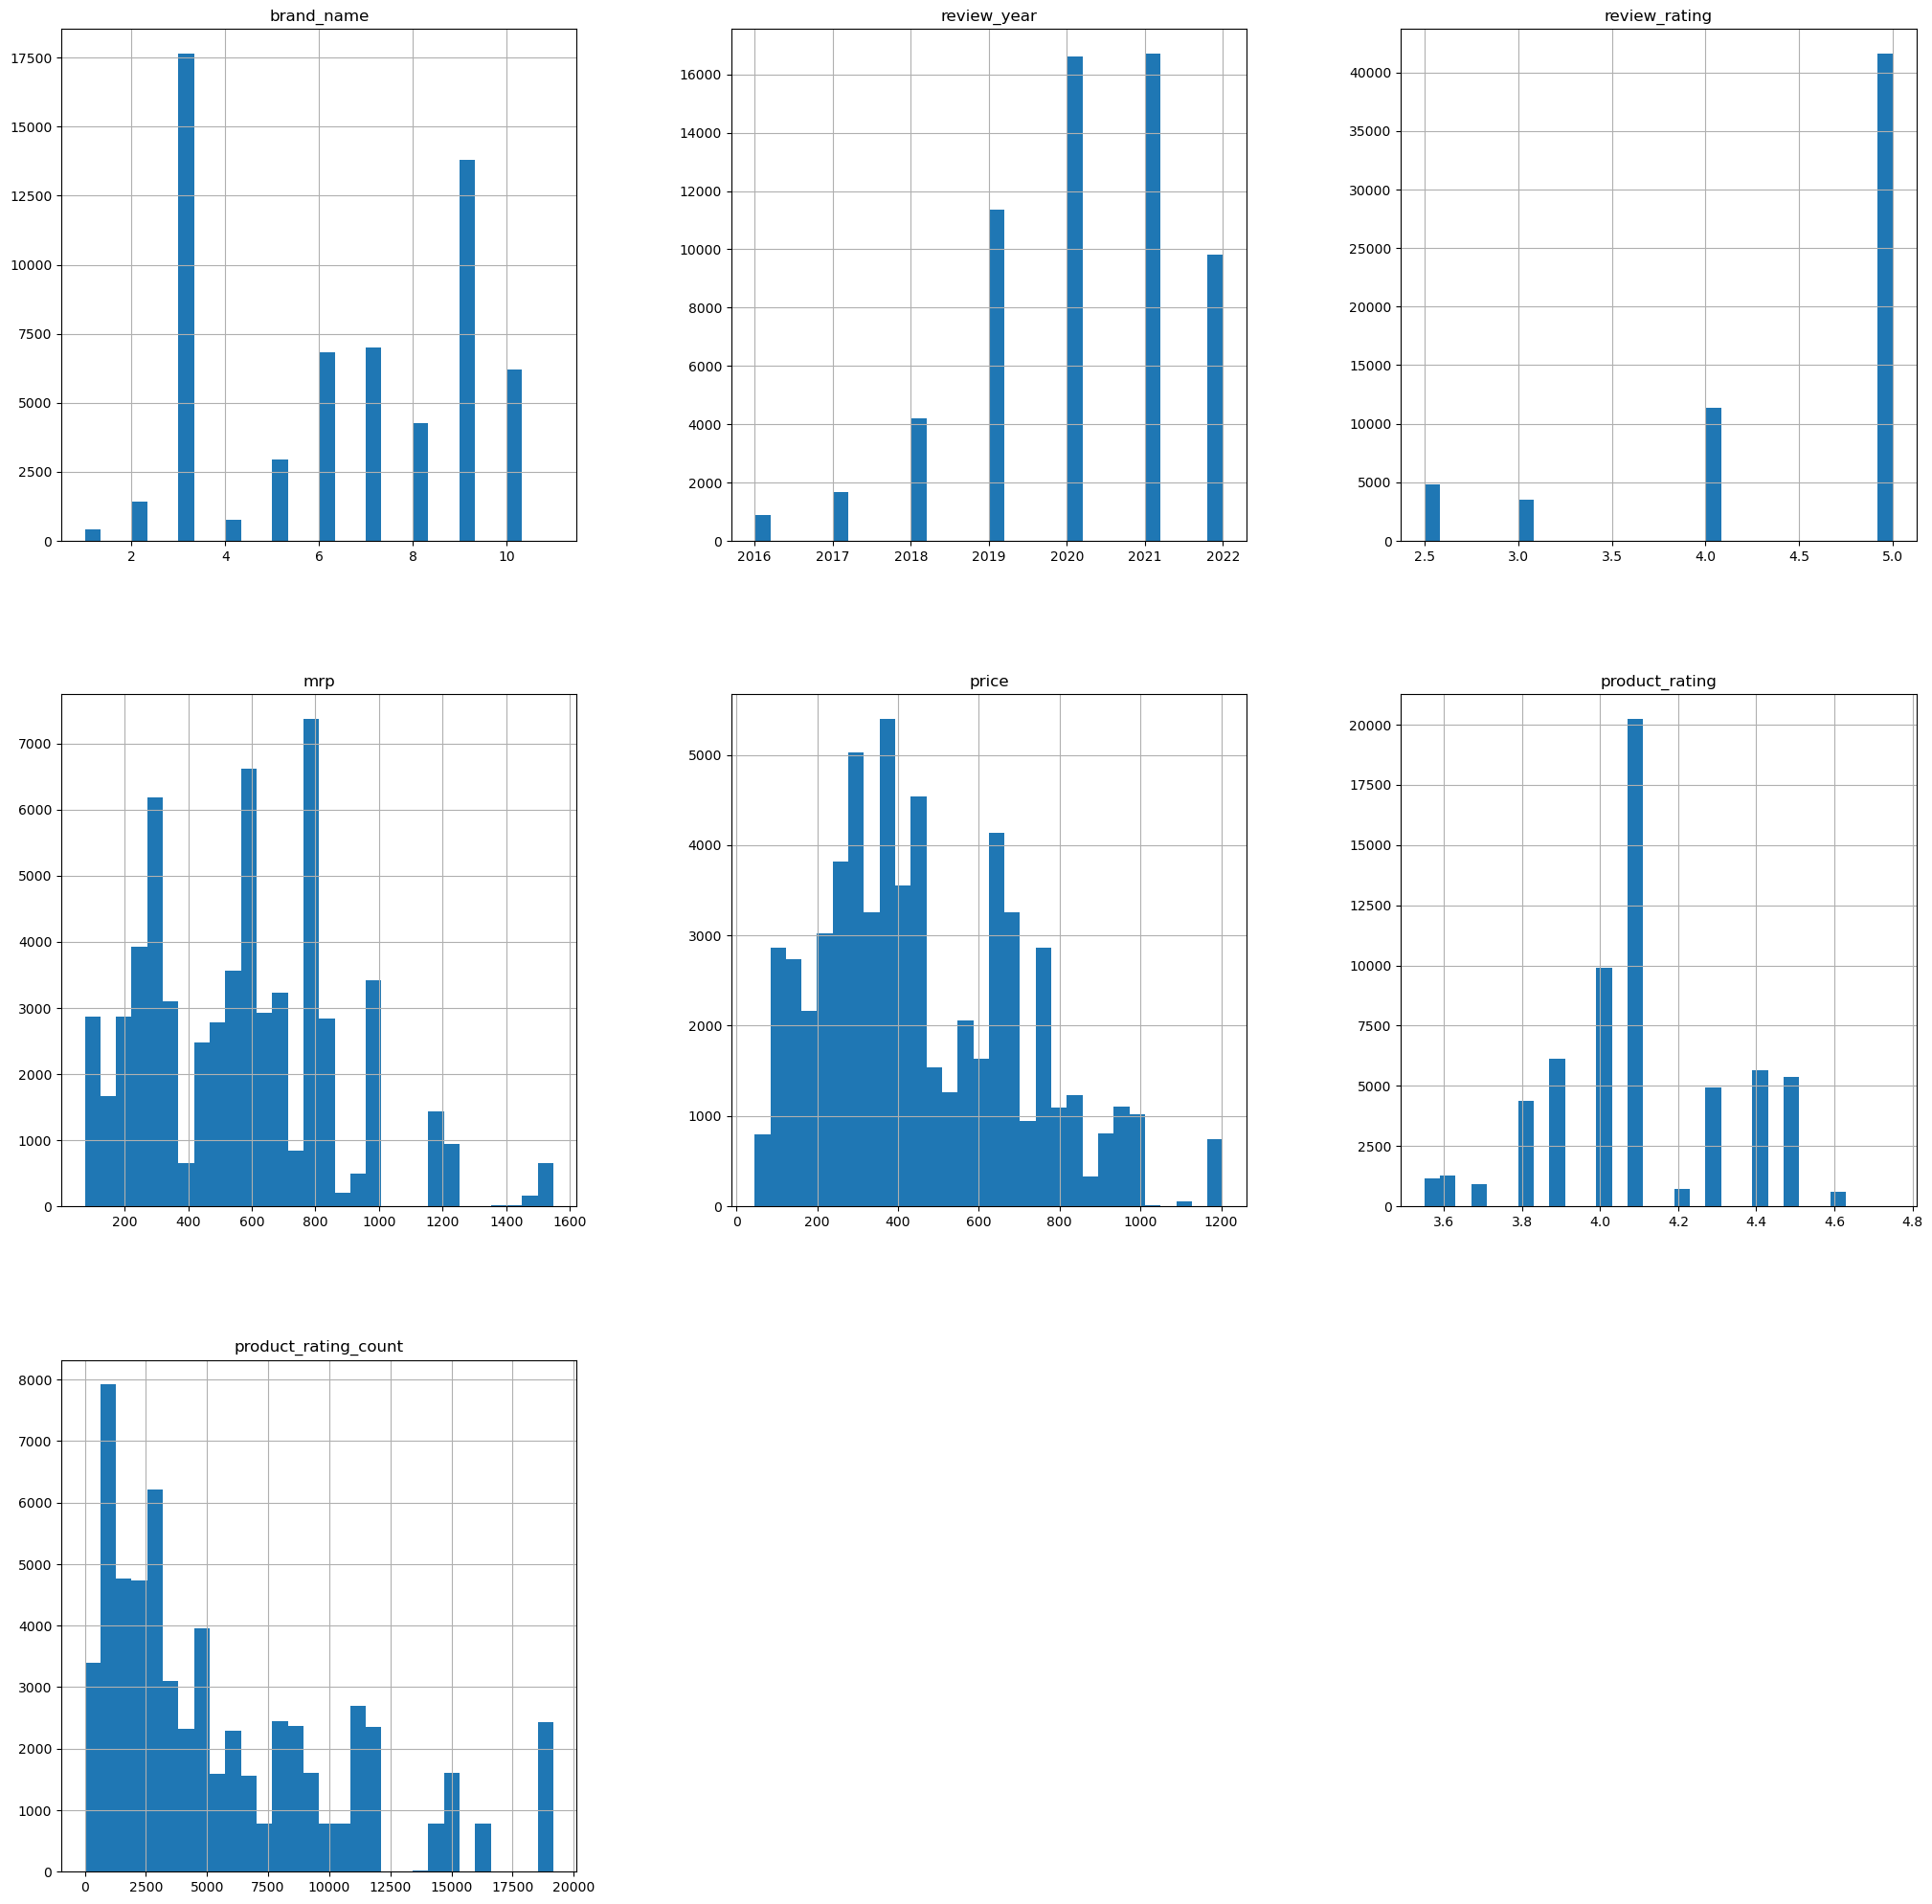

In [55]:
# ploting Histogram before transformation
data1.hist(figsize=(25,25),bins = 30)
plt.show()

In [63]:
# Ensure the data is clean
data1[skewed_feature] = data1[skewed_feature].fillna(0)  # Replace NaN with 0
data1[skewed_feature] = data1[skewed_feature].replace([np.inf, -np.inf], 0)  # Replace Inf values

# Convert to a 2D array for the transformer
data_to_transform = data1[skewed_feature].values.reshape(-1, 1)

# Apply Yeo-Johnson transformation
try:
    pt = PowerTransformer(method='yeo-johnson')
    transformed_data = pt.fit_transform(data_to_transform)
    data1[skewed_feature] = transformed_data  # Update the original column
except Exception as e:
    print(f"Error applying PowerTransformer: {e}")

Error applying PowerTransformer: Columns must be same length as key


In [67]:
# Checking Skewness after transformation
print("Skewness after transformation\n",data1[skewed_feature].skew())

Skewness after transformation
 review_year            -0.628462
review_rating          -1.434421
mrp                     0.572018
price                   0.622661
product_rating_count    1.131133
dtype: float64


# Exploratory Data Analysis (EDA)

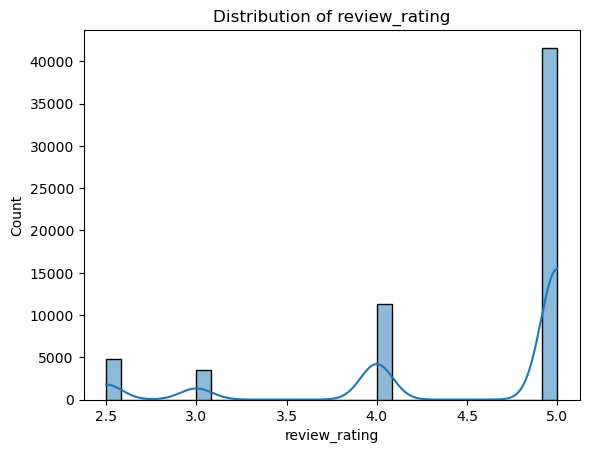

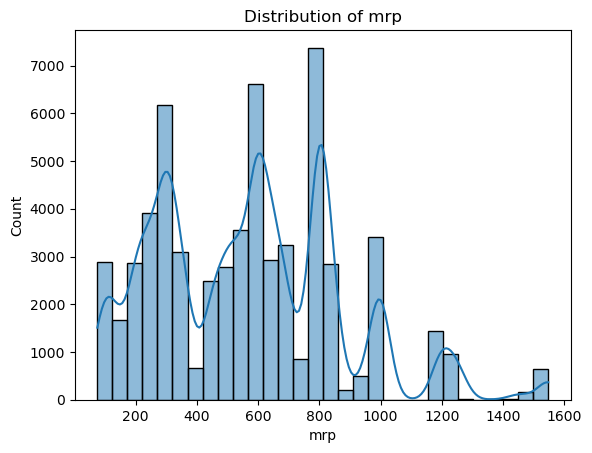

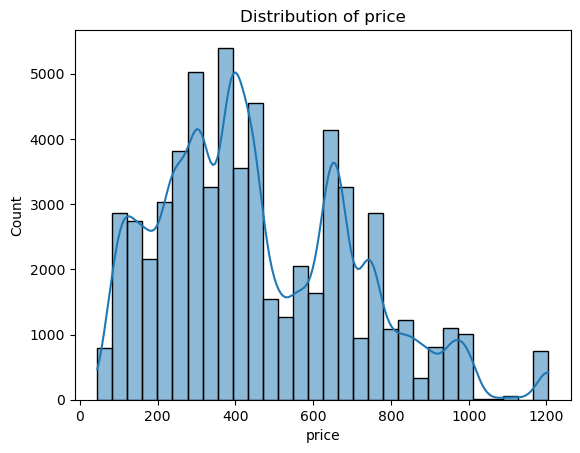

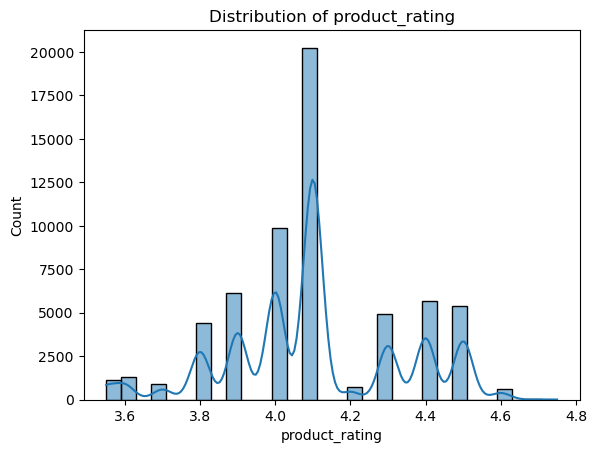

In [69]:
# 1.Histogram: Analyze the distribution of numerical columns
numerical_columns = ['review_rating', 'mrp', 'price', 'product_rating']
for col in numerical_columns:
    sns.histplot(data[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

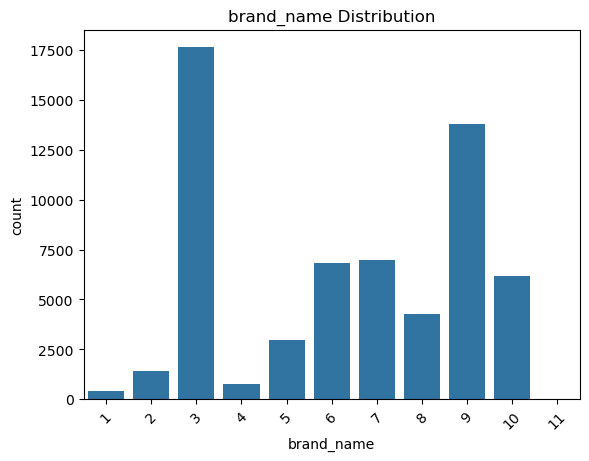

In [71]:
# 2.Count Plot: Distribution of categorical columns
sns.countplot(x='brand_name', data=data)
plt.title('brand_name Distribution')
plt.xticks(rotation=45)
plt.show()

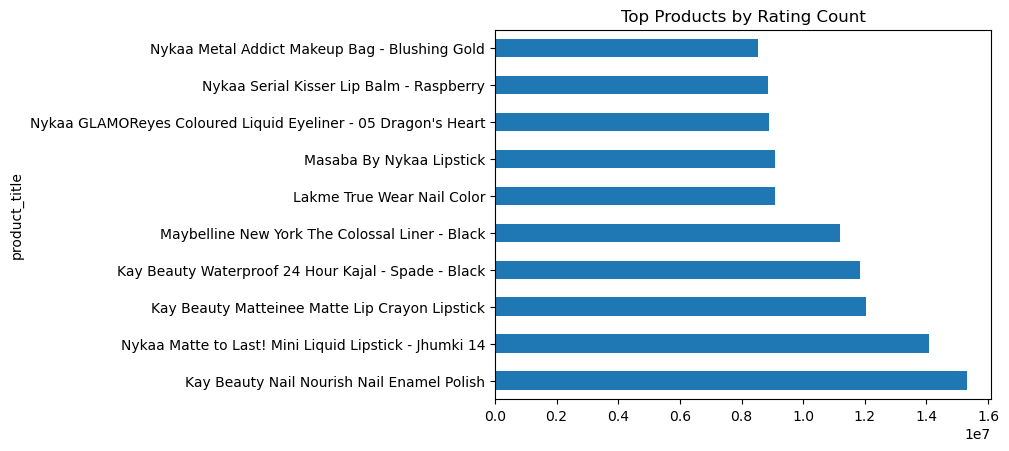

In [73]:
# 3.Bar Plot: Analyze top products by product_rating_count.
top_products = data.groupby('product_title')['product_rating_count'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh')
plt.title('Top Products by Rating Count')
plt.show()

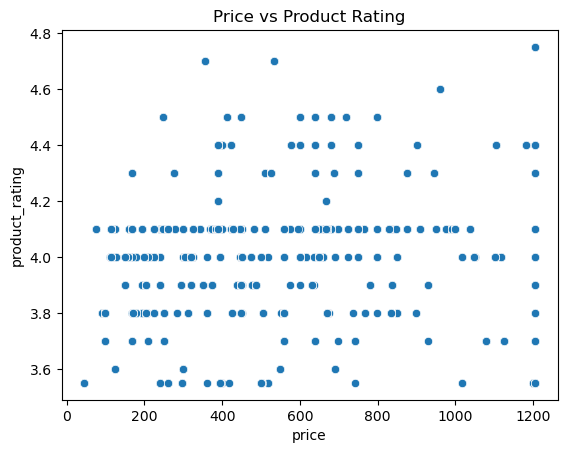

In [75]:
# 4.Scatter Plot: Explore relationships between two numerical variables, e.g., price vs. product_rating.
sns.scatterplot(x='price', y='product_rating', data=data)
plt.title('Price vs Product Rating')
plt.show()

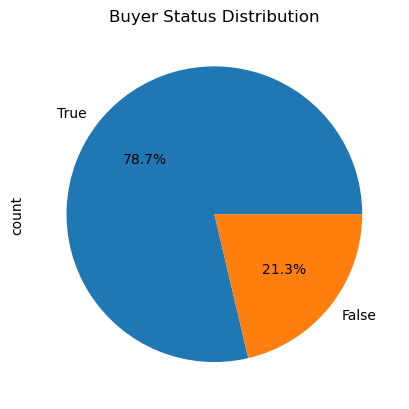

In [77]:
# 5.pie chart: Analyze is_a_buyer and pro_user proportions.
data['is_a_buyer'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Buyer Status Distribution')
plt.show()

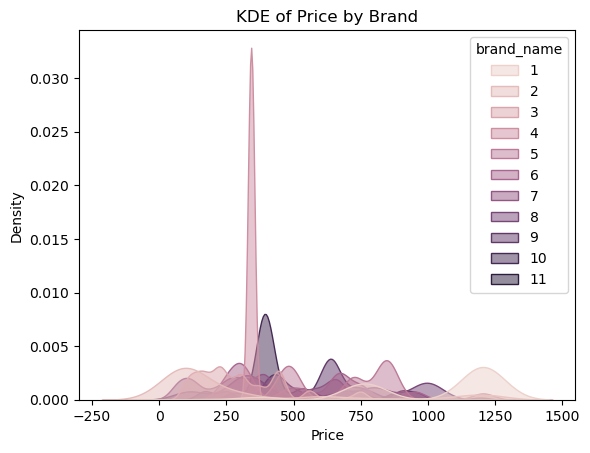

In [79]:
# 6 Kernel Density Estimation (KDE): compare distributions. For example, KDE of price for different brand_name values:
sns.kdeplot(data=data, x='price', hue='brand_name', fill=True, common_norm=False, alpha=0.5)
plt.title('KDE of Price by Brand')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

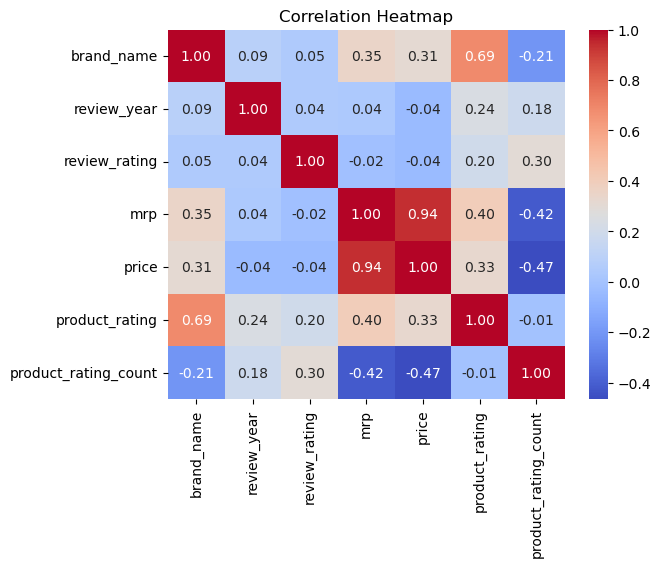

In [81]:
# 7 Heat Map 
# Select only numerical columns (Filters the dataset to include only numerical columns.)
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix(Calculates the correlation matrix only for the selected numerical columns.)
corr_matrix = numerical_data.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Feature Selection

In [83]:
# Splitting the dataset into training and testing sets
X = data1.drop('product_rating', axis=1)
y = data1['product_rating']

In [85]:
# Convert non-numeric features to numeric
X = pd.get_dummies(X, drop_first=True)

# Ensure target variable (y) is numeric
y = y.astype(float)

# Feature selection
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

# Display feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print(feature_scores)
print(f"\nSelected Features: {selected_features.tolist()}")

                                               Feature         Score
0                                           brand_name  55154.667475
5                                                  mrp  11598.647023
6                                                price   7442.508222
248      product_title_Nykaa SKINgenius BB Cream SPF30   3970.631502
1                                          review_year   3774.357745
..                                                 ...           ...
162  product_title_Nykaa Cosmetics Blendpro Powder ...      0.000008
133  product_title_Moi Day & Night Fragrance Duo - ...      0.000008
201  product_title_Nykaa Naturals 5 Shampoo Combo-O...      0.000008
109  product_title_Masaba By Nykaa - Face Palm Lips...      0.000008
176  product_title_Nykaa Cosmetics Ultra Matte Lips...      0.000008

[299 rows x 2 columns]

Selected Features: ['brand_name', 'review_year', 'mrp', 'price', 'product_title_Kay Beauty Eyeshadow Palette', 'product_title_Kay Beauty Matte HD S

In [87]:
# selected features
X_selected = X[selected_features]

# Split Data into Training and Testing Sets

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# Check the shapes of the resulting datasets
print("Training feature set shape:", X_train.shape)
print("Testing feature set shape:", X_test.shape)
print("Training target set shape:", y_train.shape)
print("Testing target set shape:", y_test.shape)

Training feature set shape: (49026, 299)
Testing feature set shape: (12257, 299)
Training target set shape: (49026,)
Testing target set shape: (12257,)


# Feature Scaling

In [93]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.fit_transform(X_test)

# Build the ML Model

In [95]:
models = {
    '1. Linear Regression' : LinearRegression(),
    '2. Decision Tree Regressor' : DecisionTreeRegressor(),
    '3. Random Forest Regressor' : RandomForestRegressor(),
    '4. Gradient Boosting Regressor' : GradientBoostingRegressor(),
    '5. Support Vector Regressor' : SVR(),
    '6. MLP Regressor' : MLPRegressor(),
    '7. Lasso Regression' : Lasso(),
    '8. AdaBoost Regressor' : AdaBoostRegressor()
}

# Model Evaluation

In [97]:
results={}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results[model_name] = {
    'MSE' : mse,
    'MAE' :mae,
    'R2 Score' : r2,
    'RMSE' :rmse
    }

results_df = pd.DataFrame(results).T
print(results_df)

                                     MSE       MAE  R2 Score      RMSE
1. Linear Regression            0.014444  0.052923  0.724846  0.120182
2. Decision Tree Regressor      0.000524  0.002321  0.990026  0.022882
3. Random Forest Regressor      0.000540  0.003770  0.989708  0.023243
4. Gradient Boosting Regressor  0.004056  0.054226  0.922737  0.063685
5. Support Vector Regressor     0.006904  0.073958  0.868478  0.083090
6. MLP Regressor                0.063595  0.172327 -0.211495  0.252181
7. Lasso Regression             0.052499  0.167124 -0.000114  0.229127
8. AdaBoost Regressor           0.019911  0.122702  0.620692  0.141107


In [99]:
# Finding The Best Model
best_model = results_df['R2 Score'].idxmax()
print(f'The best Model based on R2 Score is:\n {best_model}')
print(results_df.loc[best_model])

The best Model based on R2 Score is:
 2. Decision Tree Regressor
MSE         0.000524
MAE         0.002321
R2 Score    0.990026
RMSE        0.022882
Name: 2. Decision Tree Regressor, dtype: float64


# Hyperparameter Tuning

In [101]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [103]:
# Initialize the Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error',verbose =1, n_jobs=-1)

In [105]:
# Fit the Grid Search to the data
grid_search.fit(X_train_scaled, y_train)

best_param = grid_search.best_params_
best_score = grid_search.best_score_

# Get the best parameters and score
print(f"Best Parameters: {best_param}")
print(f"Best Cross-Validation MSE Score: {-best_score}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation MSE Score: 9.294354159370843e-05


In [107]:
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_test_pred = best_model.predict(X_test_scaled)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Printing the results
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test R2: {test_r2}")
print(f"Test RMSE: {test_rmse}")

Test MSE: 0.00042537379150687057
Test MAE: 0.00042537379150687057
Test R2: 0.991896614907201
Test RMSE: 0.02062459191128083


In [109]:
# Evaluating Model Performance with Residual Analysis

# Predicting values  
y_train_pred = best_model.predict(X_train_scaled)  
residuals = y_train - y_train_pred

In [111]:
# Cross-validate the model  
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')  
print(f'Cross-Validation MSE: {-cv_scores.mean()}')

Cross-Validation MSE: 9.294354159370843e-05


# Pipeline Creation

In [155]:
# spliting data into X and y
X = data1.drop(['product_rating'], axis=1)
y = data1['product_rating']

In [157]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
from sklearn.compose import ColumnTransformer

# Separate numeric and non-numeric columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Final pipeline with the regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=50,              # Best number of estimators from GridSearchCV
        min_samples_split=5,          # Best min_samples_split from GridSearchCV
        min_samples_leaf=2,           # Best min_samples_leaf from GridSearchCV
        max_depth=10,                 # Best max_depth from GridSearchCV
        random_state=42))])           # Ensure reproducibility

# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['brand_name', 'review_year', 'review_rating', 'mrp', 'price',
       'product_rating_count'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['product_title'], dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=2,
                                       min_samples_split=5, n_estimators=50,
                                       random_state=42))])

# Saving the Model

In [161]:
# Save the entire pipeline
joblib.dump(pipeline,'random_forest_pipeline.joblib')

['random_forest_pipeline.joblib']

In [169]:
loaded_pipeline = joblib.load('random_forest_pipeline.joblib')

In [171]:
# Load unseen data for prediction and analysis
unseen_data = pd.read_csv('nyka_top_brands_cosmetics_product_reviews.1.csv')
unseen_data.head()

,product_id,brand_name,review_id,review_title,review_text,author,review_year,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url
0,781070,1,16752142,Worth buying 50g one,Works as it claims. Could see the difference f...,Ashton Dsouza,2021,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
1,781070,1,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoo...,Amrit Neelam,2020,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
2,781070,1,15618995,perfect for summers dry for winters,I have been using this product for months now....,Sanchi Gupta,2020,4.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
3,781070,1,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a...",Ruchi Shah,2020,3.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
4,781070,1,16338982,Average,It's not that good. Please refresh try for oth...,Sukanya Sarkar,2020,2.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...


In [173]:
# Split unseen data into features (X) and target (y)
X_unseen = unseen_data.drop('product_rating', axis=1)
y_unseen = unseen_data['product_rating']

In [175]:
# Predict using the loaded pipeline
y_pred_unseen = loaded_pipeline.predict(X_unseen)

In [177]:
# Evaluate the model performance
mse_unseen = mean_squared_error(y_unseen, y_pred_unseen)
mae_unseen = mean_absolute_error(y_unseen, y_pred_unseen)
r2_unseen = r2_score(y_unseen, y_pred_unseen)
rmse_unseen = np.sqrt(mse_unseen)

In [183]:
# Print evaluation metrics
print(f"Unseen Data MSE: {mse_unseen}")
print(f"Unseen Data MAE: {mae_unseen}")
print(f"Unseen Data R²: {r2_unseen}")
print(f"Unseen Data RMSE: {rmse_unseen}")

Unseen Data MSE: 0.0030066630587310674
Unseen Data MAE: 0.03172192663076306
Unseen Data R²: 0.9459904262232524
Unseen Data RMSE: 0.05483304714067118


In [185]:
# Save the predictions for the unseen data
unseen_data['Predicted_product_rating'] = y_pred_unseen

# Save the results to a CSV file
unseen_data.to_csv('unseen_predictions.csv', index=False)
print("Predictions saved to 'unseen_predictions.csv'.")

Predictions saved to 'unseen_predictions.csv'.


In [187]:
# Showing the data with predicted product_rating
predicted_df = pd.read_csv('unseen_predictions.csv')
predicted_df.head()

,product_id,brand_name,review_id,review_title,review_text,author,review_year,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url,Predicted_product_rating
0,781070,1,16752142,Worth buying 50g one,Works as it claims. Could see the difference f...,Ashton Dsouza,2021,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...,4.068362
1,781070,1,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoo...,Amrit Neelam,2020,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...,4.068362
2,781070,1,15618995,perfect for summers dry for winters,I have been using this product for months now....,Sanchi Gupta,2020,4.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...,4.068362
3,781070,1,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a...",Ruchi Shah,2020,3.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...,4.068362
4,781070,1,16338982,Average,It's not that good. Please refresh try for oth...,Sukanya Sarkar,2020,2.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...,4.068362


In [189]:
# Analysing the actual and predicted values
actual_vs_prediction =unseen_data[['product_rating', 'Predicted_product_rating']]
actual_vs_prediction.head(20)

,product_rating,Predicted_product_rating
0,4.1,4.068362
1,4.1,4.068362
2,4.1,4.068362
3,4.1,4.068362
4,4.1,4.068362
5,4.1,4.068362
6,4.0,4.086931
7,4.0,4.086931
8,4.0,4.086931
9,4.0,4.086931


# Conclusion

The project analyzed customer reviews of cosmetics and beauty products to predict sales trends and understand customer preferences. By using machine learning models, it identified key factors affecting product ratings, such as pricing, user sentiment, and brand popularity.

The best-performing model was Linear Regression, but predictions on new data were less accurate, showing room for improvement. The study highlights the potential of machine learning to enhance marketing strategies and customer satisfaction in the cosmetics industry.

Future work includes expanding data sources, improving models with advanced techniques, and developing real-time prediction systems for better accuracy and usability.

# Further Work

Add More Data: Include reviews from other platforms like Amazon and Sephora for better analysis.
Improve Sentiment Analysis: Use advanced techniques like transformers (e.g., BERT) for better understanding of reviews.
Real-Time Predictions: Create systems to analyze live reviews and trends for instant recommendations.
Group Customers: Identify customer groups based on behavior and preferences to offer targeted strategies.
Use Images: Analyze product visuals like images and videos to understand their impact on choices.
Explain Results: Make models more transparent so businesses can understand why predictions are made.
Optimize Pricing: Study how pricing and discounts affect customer satisfaction and sales.
Better Models: Test advanced machine learning methods to improve prediction accuracy.
Interactive Tools: Build dashboards to visualize trends and predictions easily.
Test Strategies: Use A/B testing to ensure the recommendations work effectively.